In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# selecting only features that are usefult for us as we want to target the customer for running targeted ads 
X=data.iloc[:,[3,4]].values

In [5]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Dendrogram

In [6]:
# visual representation that helps to find the optimal number of clusters 
from scipy.cluster import hierarchy as sch 

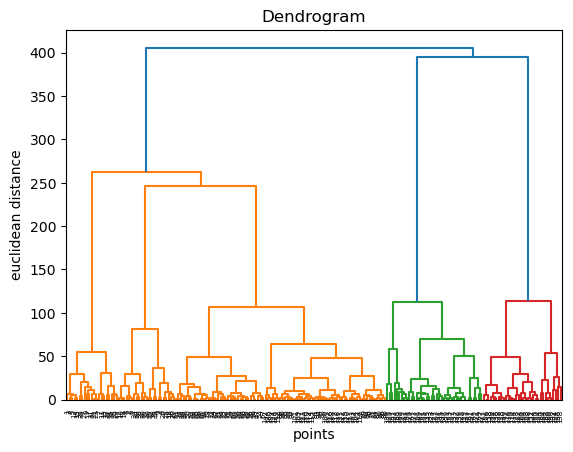

In [9]:
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))
plt.title("Dendrogram")
plt.xlabel("points")
plt.ylabel("euclidean distance")
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_model=model.fit_predict(X)

C:\tt\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [12]:
print(y_model)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualizing clusters 

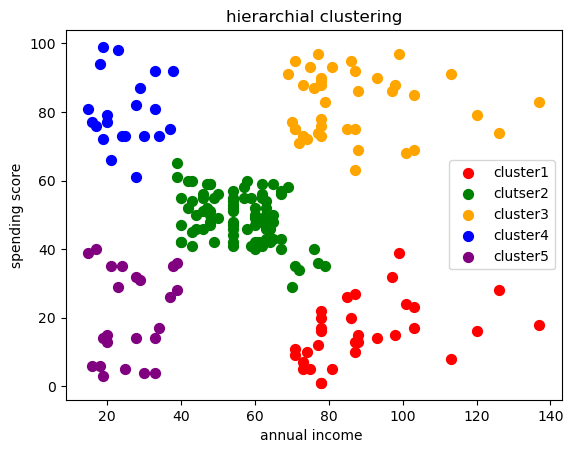

In [14]:
plt.scatter(X[y_model==0,0],X[y_model==0,1],c='red',s=50,label="cluster1")
plt.scatter(X[y_model==1,0],X[y_model==1,1],c='green',s=50,label='clutser2')
plt.scatter(X[y_model==2,0],X[y_model==2,1],c='orange',s=50,label='cluster3')
plt.scatter(X[y_model==3,0],X[y_model==3,1],c='blue',s=50,label='cluster4')
plt.scatter(X[y_model==4,0],X[y_model==4,1],c='purple',s=50,label='cluster5')
plt.xlabel('annual income ')
plt.ylabel('spending score')
plt.title('hierarchial clustering')
plt.legend()
plt.show()

In [15]:
# as from scatter plt we can see that customers of cluster1 is best suited for out targeted ads as they have more 
# annual income but less spending score 

In [20]:
Y=pd.Series(y_model,name='clusters')
df=pd.concat([data,Y],axis=1)
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     clusters  
0           4  
1           3  
2           4  
3           3  
4      

## finding details of customers who belong to cluster 1

In [21]:
target = df[df['clusters']==1]
print(target)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
43           44  Female   31                  39                      61   
45           46  Female   24                  39                      65   
46           47  Female   50                  40                      55   
47           48  Female   27                  40                      47   
48           49  Female   29                  40                      42   
..          ...     ...  ...                 ...                     ...   
126         127    Male   43                  71                      35   
132         133  Female   25                  72                      34   
142         143  Female   28                  76                      40   
146         147    Male   48                  77                      36   
160         161  Female   56                  79                      35   

     clusters  
43          1  
45          1  
46          1  
47          1  
48     